# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

train=pd.read_csv("train.csv", sep="|")
test = pd.read_csv("test.csv", sep="|")

X = train.drop(columns='fraud')
Y = train['fraud']

train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [2]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


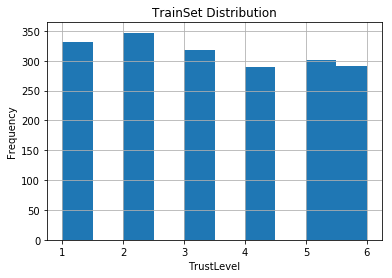

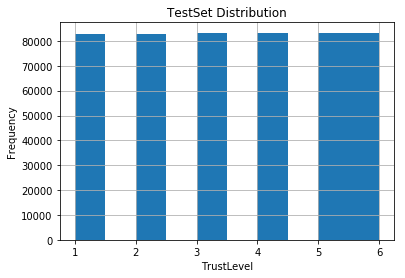

In [3]:
train.hist(column='trustLevel')
plt.title('TrainSet Distribution',fontsize=12)
plt.xlabel("TrustLevel")
plt.ylabel("Frequency")
plt.show()

test.hist(column='trustLevel')
plt.title('TestSet Distribution',fontsize=12)
plt.xlabel("TrustLevel")
plt.ylabel("Frequency")
plt.show()

In [4]:
train.corr().style.background_gradient().set_precision(2)


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1,0.025,0.048,-0.017,0.017,0.0065,0.031,0.028,0.0092,-0.32
totalScanTimeInSeconds,0.025,1,-0.0012,0.019,0.0091,-0.011,-0.26,-0.21,-0.012,0.11
grandTotal,0.048,-0.0012,1,0.0063,-0.031,-0.0082,-0.012,0.076,-0.0089,0.0014
lineItemVoids,-0.017,0.019,0.0063,1,-0.017,-0.0072,-0.0044,0.0051,0.35,0.063
scansWithoutRegistration,0.017,0.0091,-0.031,-0.017,1,0.019,-0.024,-0.019,0.0028,0.074
quantityModifications,0.0065,-0.011,-0.0082,-0.0072,0.019,1,-0.015,0.011,0.018,-0.00086
scannedLineItemsPerSecond,0.031,-0.26,-0.012,-0.0044,-0.024,-0.015,1,0.69,-0.056,-0.023
valuePerSecond,0.028,-0.21,0.076,0.0051,-0.019,0.011,0.69,1,0.02,-0.029
lineItemVoidsPerPosition,0.0092,-0.012,-0.0089,0.35,0.0028,0.018,-0.056,0.02,1,-0.09
fraud,-0.32,0.11,0.0014,0.063,0.074,-0.00086,-0.023,-0.029,-0.09,1


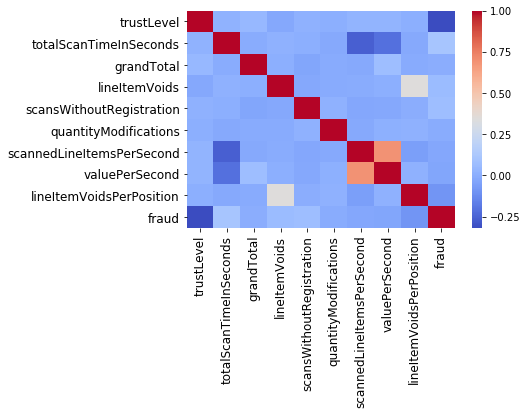

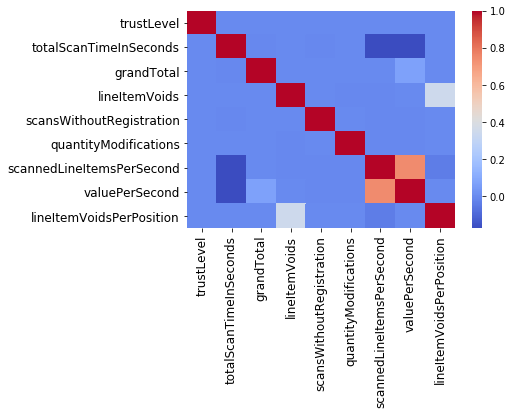

In [5]:
import seaborn as sns
s=sns.heatmap(train.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.show()

import seaborn as sns
s=sns.heatmap(test.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.show()

### Key Points:
- Huge difference number of the train set and test set
- Unbalanced data might cause some problem
- The distribution of  TrustLevel for both sets are isomorphy
- TrustLevel has a substantial negative effect on the Fraud
- Detect the pattern of TrustLevel might be beneficial for the Fraud

# Classification
- Use Keras for NN 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

X = X.drop(columns='trustLevel').astype(float)
Y = train['trustLevel']

# convert integers to dummy variables 
dummy_y = np_utils.to_categorical(Y)


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, init='normal', activation='relu')) model.add(Dense(3, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) return model

estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)

In [ ]:
# k fold val (k=10)
kfold = KFold(n=len(X), n_folds=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))